In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv('HeartDisease.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [3]:
columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','cal','thal','num']
df.columns=columns
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,cal,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [4]:
df.shape

(200, 14)

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
cal         0
thal        0
num         0
dtype: int64

In [6]:
df.describe()

,age,sex,cp,restecg,num
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,59.350000,0.970000,3.505000,0.735000,1.520000
std,7.811697,0.171015,0.795701,0.683455,1.219441
min,35.000000,0.000000,1.000000,0.000000,0.000000
25%,55.000000,1.000000,3.000000,0.000000,0.000000
50%,60.000000,1.000000,4.000000,1.000000,1.000000
75%,64.000000,1.000000,4.000000,1.000000,3.000000
max,77.000000,1.000000,4.000000,2.000000,4.000000


In [7]:
# function to handle the values with '?'
def handleJunkValues(row):
    if str(row).strip()== '?':
        return np.nan
    else:
        return row

In [8]:
for i in columns:
    print(i,':', len(df.loc[df[i] == '?']),'out of',len(df))

age : 0 out of 200
sex : 0 out of 200
cp : 0 out of 200
trestbps : 56 out of 200
chol : 7 out of 200
fbs : 7 out of 200
restecg : 0 out of 200
thalach : 53 out of 200
exang : 53 out of 200
oldpeak : 56 out of 200
slope : 102 out of 200
cal : 198 out of 200
thal : 166 out of 200
num : 0 out of 200


In [9]:
for i in columns:
    df[i] = df[i].apply(handleJunkValues)

In [10]:
#wwe can drop the column as cal is having 198 rows as '?' out of  200 rows
df = df.drop(columns='cal')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,NaN,2
1,44,1,4,130,209,0,1,127,0,0,NaN,NaN,0
2,60,1,4,132,218,0,1,140,1,1.5,3,NaN,2
3,55,1,4,142,228,0,1,149,1,2.5,1,NaN,1
4,66,1,3,110,213,1,2,99,1,1.3,2,NaN,0


In [11]:
df.age.mean()

59.35

In [12]:
df.sex.value_counts()

1    194
0      6
Name: sex, dtype: int64

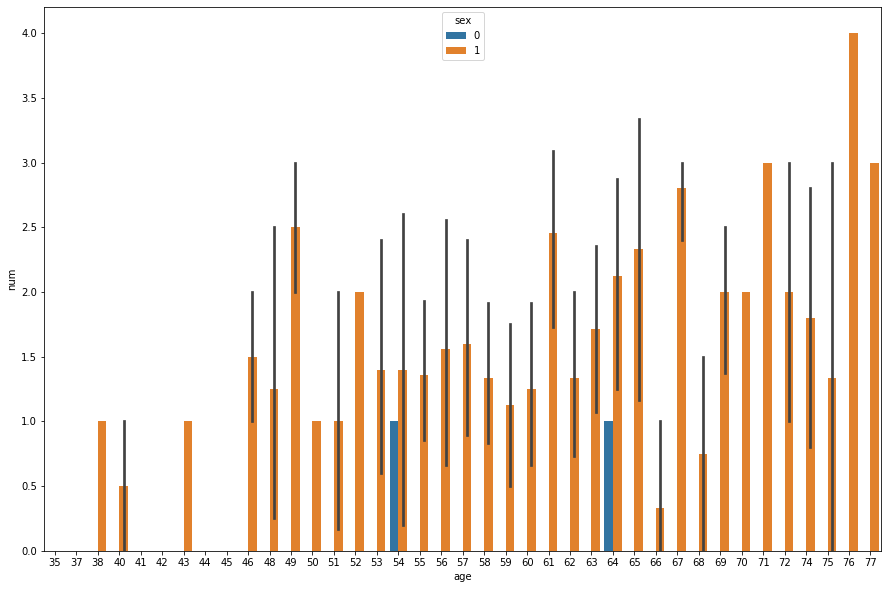

In [13]:
plt.figure(figsize=(15,10))
sns.barplot(x='age',y='num',hue='sex',data=df)

In [14]:
#there is lot of difference between male and female. Out of 200 only 6 are for female. So dropping the column as it has no value
df.drop(columns=['sex'],inplace=True,axis=1)
df.head()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,num
0,63,4,140,260,0,1,112,1,3,2,NaN,2
1,44,4,130,209,0,1,127,0,0,NaN,NaN,0
2,60,4,132,218,0,1,140,1,1.5,3,NaN,2
3,55,4,142,228,0,1,149,1,2.5,1,NaN,1
4,66,3,110,213,1,2,99,1,1.3,2,NaN,0


In [15]:
df.cp.value_counts(dropna=False)

4    131
3     47
2     14
1      8
Name: cp, dtype: int64

In [16]:
df.fbs.value_counts(dropna=False)

0      125
1       68
NaN      7
Name: fbs, dtype: int64

In [17]:
print(df.fbs.mode())
print(df.fbs.median())

0    0
dtype: object
0.0


In [18]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(np.array(df['fbs']).reshape(-1,1))
df['fbs'] = imputer.transform(np.array(df['fbs']).reshape(-1,1))

In [19]:
df.restecg.value_counts(dropna=False)

1    93
0    80
2    27
Name: restecg, dtype: int64

In [20]:
df.exang.value_counts(dropna=False)

1      95
NaN    53
0      52
Name: exang, dtype: int64

In [21]:
print(df.exang.mode())
print(df.exang.median())

0    1
dtype: object
1.0


In [22]:
#df['exang']=df['exang'].fillna(df.exang.mode())
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(np.array(df['exang']).reshape(-1,1))
df['exang'] = imputer.transform(np.array(df['exang']).reshape(-1,1))

In [23]:
df.slope.value_counts(dropna=False)

NaN    102
2       53
3       29
1       16
Name: slope, dtype: int64

In [24]:
print(df.slope.mode())
print(df.slope.median())

0    2
dtype: object
2.0


In [25]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(np.array(df['slope']).reshape(-1,1))
df['slope'] = imputer.transform(np.array(df['slope']).reshape(-1,1))

In [26]:
df.num.value_counts(dropna=False)

1    56
0    51
3    42
2    41
4    10
Name: num, dtype: int64

In [27]:
df.thal.value_counts(dropna=False)

NaN    166
7       22
6        8
3        4
Name: thal, dtype: int64

In [28]:
print(df.thal.mode())
print(df.thal.median())

0    7
dtype: object
7.0


In [29]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(np.array(df['thal']).reshape(-1,1))
df['thal'] = imputer.transform(np.array(df['thal']).reshape(-1,1))

In [30]:
df.oldpeak.value_counts(dropna=False)

NaN     56
0       40
2       25
1.5     21
1       18
3       13
2.5      9
0.5      7
4        4
1.3      2
0.8      1
-0.5     1
1.6      1
1.7      1
3.5      1
Name: oldpeak, dtype: int64

In [31]:
print(df.oldpeak.median())
print(df.oldpeak.mode())

1.5
0    0
dtype: object


In [32]:
#df['oldpeak'] = df.oldpeak.fillna(df.oldpeak.median())
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(np.array(df['oldpeak']).reshape(-1,1))
df['oldpeak'] = imputer.transform(np.array(df['oldpeak']).reshape(-1,1))

In [33]:
print(df.trestbps.median())
print(df.trestbps.mode())

130.0
0    120
dtype: object


In [34]:
#df['oldpeak'] = df.oldpeak.fillna(df.oldpeak.median())
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(np.array(df['trestbps']).reshape(-1,1))
df['trestbps'] = imputer.transform(np.array(df['trestbps']).reshape(-1,1))

In [35]:
print(df.thalach.median())
print(df.thalach.mode())

120.0
0    120
1    140
dtype: object


In [36]:
#df['oldpeak'] = df.oldpeak.fillna(df.oldpeak.median())
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(np.array(df['thalach']).reshape(-1,1))
df['thalach'] = imputer.transform(np.array(df['thalach']).reshape(-1,1))

In [37]:
# df['fbs'].fillna(value = df.fbs.mode(),inplace=True)
df['fbs'].isnull().sum()

0

In [38]:
print(df.chol.median())
print(df.chol.mode())

216.0
0    0
dtype: object


In [39]:
#df['oldpeak'] = df.oldpeak.fillna(df.oldpeak.median())
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(np.array(df['chol']).reshape(-1,1))
df['chol'] = imputer.transform(np.array(df['chol']).reshape(-1,1))

In [40]:
df.isnull().sum()

age         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [41]:
df.head()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,num
0,63,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2.0,7.0,2
1,44,4,130.0,209.0,0.0,1,127.0,0.0,0.0,2.0,7.0,0
2,60,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,7.0,2
3,55,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,7.0,1
4,66,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,7.0,0


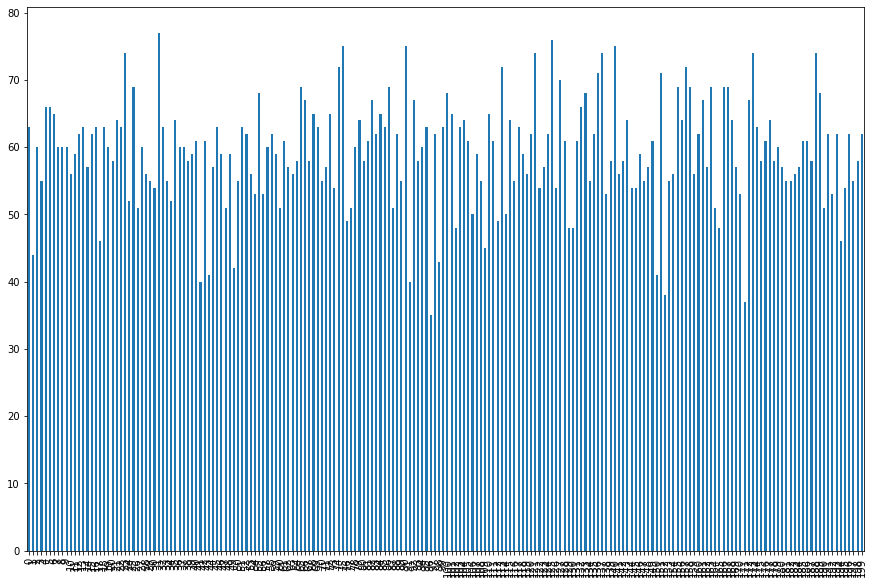

In [42]:
plt.figure(figsize=(15,10))
df['age'].plot(kind='bar')

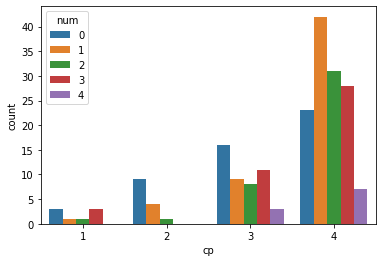

In [43]:
sns.countplot(x='cp',hue='num',data=df)

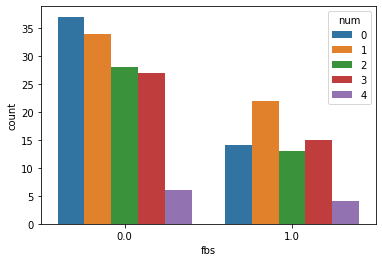

In [44]:
sns.countplot(x='fbs',hue='num',data=df)

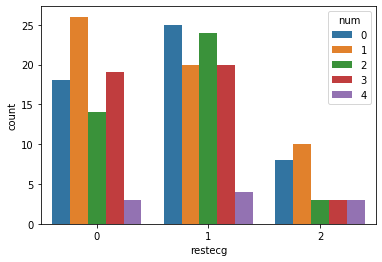

In [45]:
sns.countplot(x='restecg',hue='num',data=df)

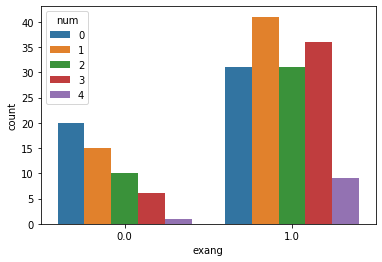

In [46]:
sns.countplot(x='exang',hue='num',data=df)

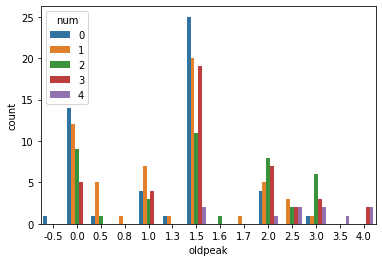

In [47]:
sns.countplot(x='oldpeak',hue='num',data=df)

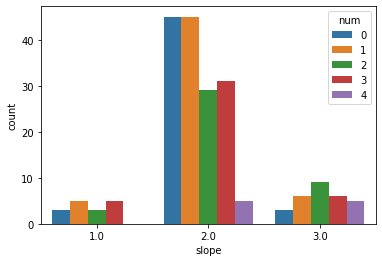

In [48]:
sns.countplot(x='slope',hue='num',data=df)

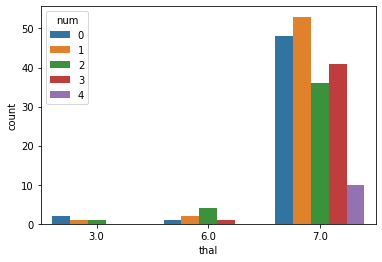

In [49]:
sns.countplot(x='thal',hue='num',data=df)

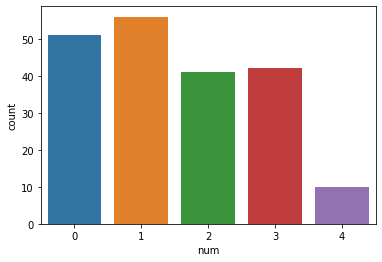

In [50]:
sns.countplot(x='num',data=df)

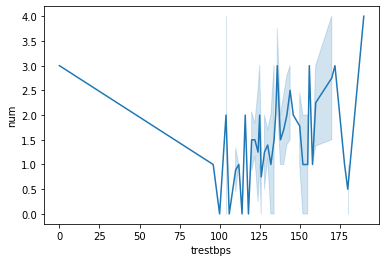

In [51]:
#trestbps	chol	fbs	restecg	thalach	
sns.lineplot(x='trestbps',y='num',data=df)

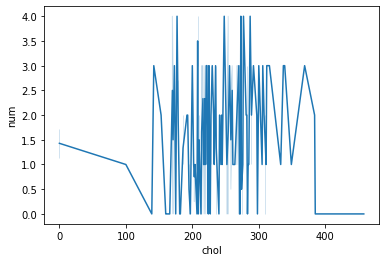

In [52]:
#trestbps	chol	fbs	restecg	thalach	
sns.lineplot(x='chol',y='num',data=df)

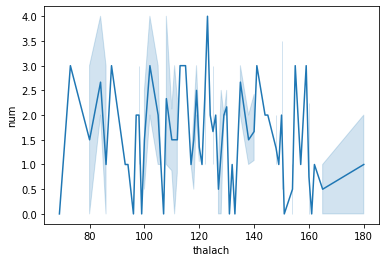

In [53]:
#trestbps	chol	fbs	restecg	thalach	
sns.lineplot(x='thalach',y='num',data=df)

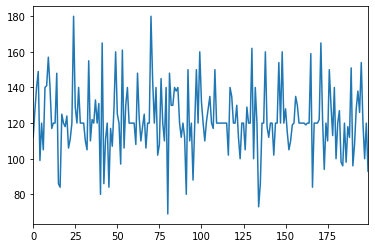

In [54]:
df['thalach'].plot()

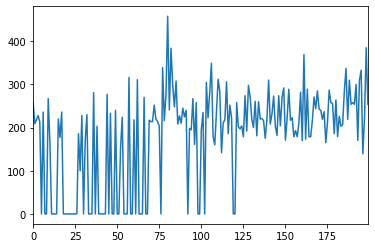

In [55]:
df['chol'].plot()

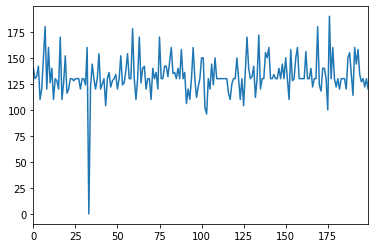

In [56]:
df['trestbps'].plot()

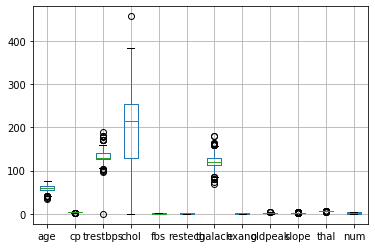

In [57]:
df.boxplot()

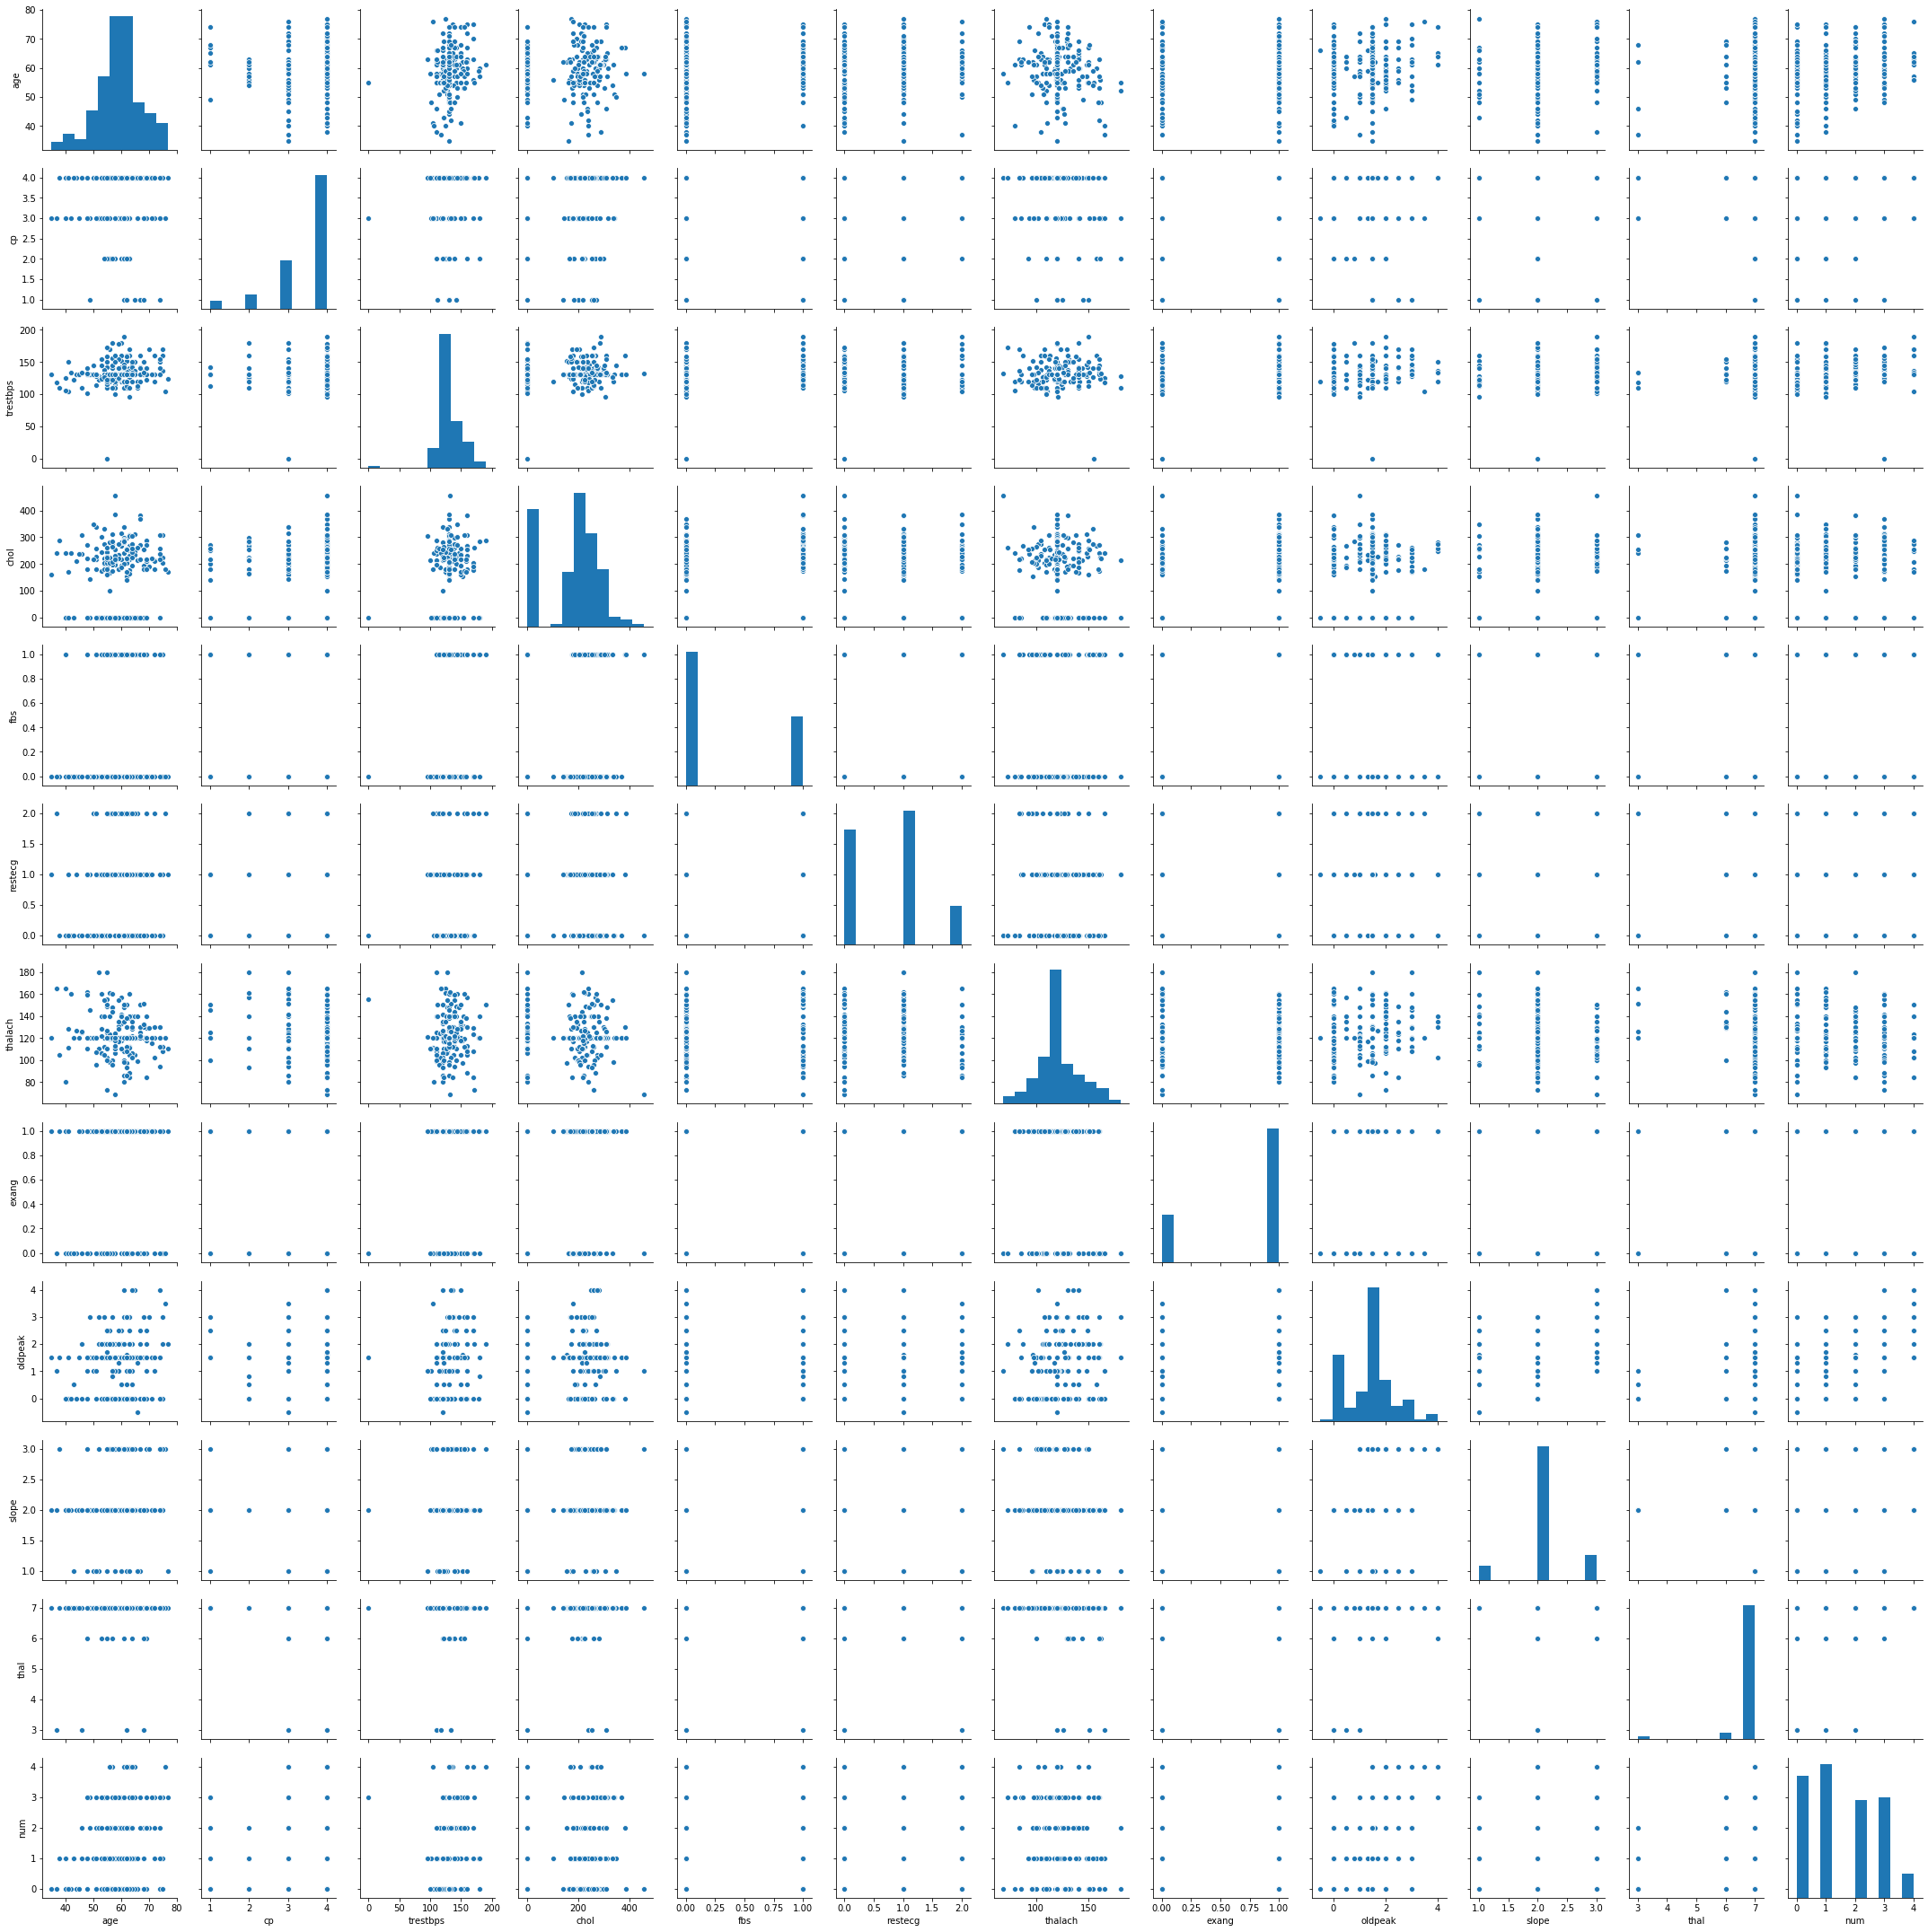

In [58]:
sns.pairplot(df)

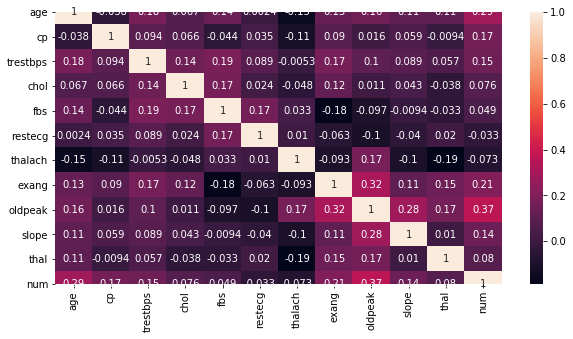

In [59]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

I didnt find any  highly correlated variable

In [61]:
X = df.drop(columns=['num'])
y=df['num']

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.2)

In [63]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
def max_score(model,X,y):
    max_score= 0
    cross_max_score = 0
    for r in range(42,100):
        cross_max_score = cross_val_score(model,X,y,cv=5,scoring='accuracy').mean()
        X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.3,random_state=r)
        model.fit(X_train,y_train)
        pred = model.predict(X_test)
        curr_score = accuracy_score(y_test,pred)
        if(curr_score >max_score):
            max_score = curr_score
            fin_r = r
    print('Max r value',fin_r)
    print('max Score', max_score)
    print('Cross_val_max_Score', cross_max_score)
    return fin_r,max_score,cross_max_score

In [64]:
from sklearn.model_selection import GridSearchCV
def Gridsearchvc(clf,params,cv,X,y):
    return_value=''
    clf = GridSearchCV(clf, params, cv=cv)
    clf.fit(X,y)
    print(clf.best_params_)
    return clf.best_params_


In [65]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
random_value, max_Score, cross_val_Score = max_score(model,X,y)

params={"C":[10,20,30],"tol":[0.0005,0.0015,0.0020]}
best_params = Gridsearchvc(model,params,5,X,y)


Max r value 52
max Score 0.4166666666666667
Cross_val_max_Score 0.36
{'C': 10, 'tol': 0.0005}


In [66]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
random_value, max_Score, cross_val_Score = max_score(model,X,y)

params={"n_estimators":[10,100,500]}
best_params = Gridsearchvc(model,params,5,X,y)

Max r value 89
max Score 0.48333333333333334
Cross_val_max_Score 0.35500000000000004
{'n_estimators': 500}


In [67]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
random_value, max_Score, cross_val_Score = max_score(model,X,y)

params={"criterion":['entropy','gini'],"max_leaf_nodes":[50,100,150]}
best_params = Gridsearchvc(model,params,5,X,y)

Max r value 74
max Score 0.5
Cross_val_max_Score 0.32999999999999996
{'criterion': 'gini', 'max_leaf_nodes': 150}


In [68]:
from sklearn.svm import SVC
model=SVC()
random_value, max_Score, cross_val_Score = max_score(model,X,y)

# params={
# 'n_estimators':[10,50,100],
# 'max_features':[0.5,0.11],
# 'learning_rate':[0.1,0.15],
# 'max_depth':[2,4],
# 'min_samples_leaf':[2,6],
# 'random_state':[50,70]
# }

# best_params = Gridsearchvc(model,params,5,'roc_auc',X,df_y)
# best_params


Max r value 49
max Score 0.3
Cross_val_max_Score 0.27999999999999997


In [69]:
#using KNN 
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
random_value, max_Score, cross_val_Score = max_score(model,X,y)

params={"n_neighbors":range(1,100)}
best_params = Gridsearchvc(model,params,5,X,y)
best_params

Max r value 56
max Score 0.4
Cross_val_max_Score 0.3
{'n_neighbors': 11}


{'n_neighbors': 11}

In [70]:
#using GradientBoosterAlgorithm 
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier()
random_value, max_Score, cross_val_Score = max_score(model,X,y)

params={
'n_estimators':[10,50,100],
'max_features':[0.5,0.11],
'learning_rate':[0.1,0.15],
'max_depth':[2,4],
'min_samples_leaf':[2,6],
'random_state':[50,70]
}

best_params = Gridsearchvc(model,params,5,X,y)
best_params

Max r value 67
max Score 0.45
Cross_val_max_Score 0.375
{'learning_rate': 0.1, 'max_depth': 4, 'max_features': 0.11, 'min_samples_leaf': 2, 'n_estimators': 50, 'random_state': 50}


{'learning_rate': 0.1,
 'max_depth': 4,
 'max_features': 0.11,
 'min_samples_leaf': 2,
 'n_estimators': 50,
 'random_state': 50}

None of the algorithm is performing well .As the dataset is not well formed.